In [10]:
import sys
#sys.modules.pop('CLASS_BABY')
#sys.modules.pop('CLASS_SAMPLE')


from CLASS_BABY import *
from CLASS_SAMPLE import *

import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

In [11]:
def median_in_bins_err(x,y,x1,x2,nbins,p1=0.25,p2=0.75):
    medians_x = np.zeros(nbins)
    medians_y = np.zeros(nbins)
    err_y_low = np.zeros(nbins)
    err_y_high = np.zeros(nbins)
    x = np.array(x)
    y = np.array(y)
    width = (float(x2)-float(x1))/nbins
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        #print x_low, x_high
        sel = np.where((x>x_low)&(x<x_high))
        temp_ord = np.copy(y[sel])
        temp_ord = np.sort(temp_ord)
        medians_y[i] = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
        err_y_low[i]  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-medians_y[i])
        err_y_high[i]  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-medians_y[i])
        #err_y[i] = [err_y_low,err_y_high]
        medians_x[i] = np.median(x[sel])
    return np.array(medians_x),np.array(medians_y),err_y_low,err_y_high

In [12]:
# Not specified types are strings
T = pd.read_csv('../TOST_data/average_properties.txt',
            sep='\t',index_col=0,na_values=-99,
            dtype={'WEIGHT_GRAMS': float,
                   'GEST_AGE_DAYS':float,
                   'DELTA_SEC_MEASURE':float,
                   'MED_SPO2':float,
                   'MED_PI':float,
                   'MED_PR':float,
                   'BRADY_SEC_PR':float,
                   'BRADY_RATIO_PR':float,
                   'BRADY_RATIO_PR_m10':float,
                   'BRADY_RATIO_PR_m20':float,
                   'BRADY_RATIO_PR_m30':float,
                   'BRADY_RATIO_PR_m40':float,
                   'BRADY_SEC_SPO2':float,
                   'BRADY_RATIO_SPO2':float,
                   'BRADY_SEC_PR_DYN':float,
                   'BRADY_RATIO_PR_DYN':float})

## Example of selections

In [13]:
T[(T['BABY_IDS']=='FMC003' )&(T['PHN']==False)]

,BABY_IDS,GENDER,WEIGHT_GRAMS,GEST_AGE_DAYS,DELIVERY,BIRTH_DATE,FILE,DELTA_SEC_MEASURE,MED_SPO2,MED_PR,...,BRADY_SEC_PR,BRADY_RATIO_PR,BRADY_RATIO_PR_m10,BRADY_RATIO_PR_m20,BRADY_RATIO_PR_m30,BRADY_RATIO_PR_m40,BRADY_SEC_SPO2,BRADY_RATIO_SPO2,BRADY_SEC_PR_DYN,BRADY_RATIO_PR_DYN
0,FMC003,Male,3775.0,280.0,vaginal,2014-03-03 18:25:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,58400.0,99.0,117.0,...,454.0,0.685801,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,286.0,0.432024
1,FMC003,Male,3775.0,280.0,vaginal,2014-03-03 18:25:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,58499.0,95.0,115.0,...,3112.0,0.794283,0.279735,0.262889,0.260337,0.260337,3866.0,0.986728,1650.0,0.421133


### You can combine different selection!
This is very powerful!!

In [14]:
sel1 = (T['BABY_IDS']=='FMC003' )
sel2 = (T['PHN']==False)
sel3 = (T['WRIST']==True)

In [15]:
T[sel1 & sel2 & sel3]

,BABY_IDS,GENDER,WEIGHT_GRAMS,GEST_AGE_DAYS,DELIVERY,BIRTH_DATE,FILE,DELTA_SEC_MEASURE,MED_SPO2,MED_PR,...,BRADY_SEC_PR,BRADY_RATIO_PR,BRADY_RATIO_PR_m10,BRADY_RATIO_PR_m20,BRADY_RATIO_PR_m30,BRADY_RATIO_PR_m40,BRADY_SEC_SPO2,BRADY_RATIO_SPO2,BRADY_SEC_PR_DYN,BRADY_RATIO_PR_DYN
1,FMC003,Male,3775.0,280.0,vaginal,2014-03-03 18:25:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,58499.0,95.0,115.0,...,3112.0,0.794283,0.279735,0.262889,0.260337,0.260337,3866.0,0.986728,1650.0,0.421133


# Distribution of PR for different gestational age

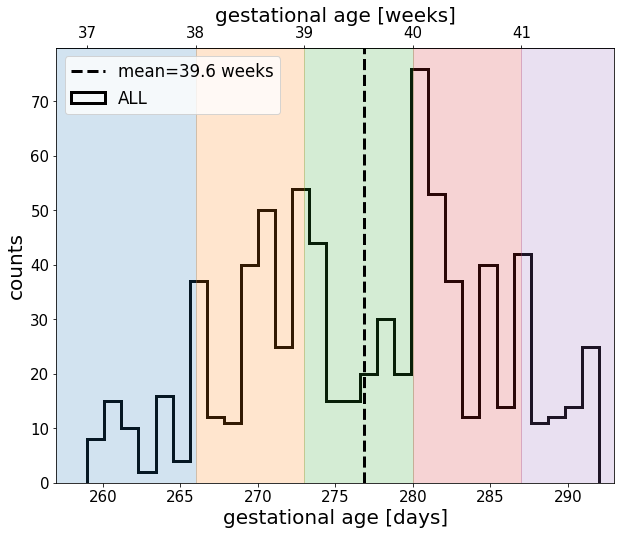

In [16]:
fig,ax = plt.subplots(figsize=(10,8))
ax.hist(T['GEST_AGE_DAYS'],bins=30,histtype='step',lw=3,color='k',label='ALL')
ax.axvline(np.mean(T['GEST_AGE_DAYS']),color='k',ls='dashed',lw=3,label='mean=%.1f weeks'%(np.mean(T['GEST_AGE_DAYS'])/7))
ax.set_xlabel('gestational age [days]')
ax.set_ylabel('counts')

#stat, p = ss.ttest_ind(girls.gestational_age_days, boys.gestational_age_days)
#print('t=%.3f, p=%.3f' % (stat, p))
#plt.title('ALL deliveries p-value = '+str(round(p,3)))

#plt.axvline(38*7,ls='dotted',lw=3,color='red')
#plt.axvline(39*7,ls='dotted',lw=3,color='red')
#plt.axvline(40*7,ls='dotted',lw=3,color='red')
#plt.axvline(41*7,ls='dotted',lw=3,color='red')

ax.axvspan(35*7, 38*7, alpha=0.2, color='C0')
ax.axvspan(38*7, 39*7, alpha=0.2, color='C1')
ax.axvspan(39*7, 40*7, alpha=0.2, color='C2')
ax.axvspan(40*7, 41*7, alpha=0.2, color='C3')
ax.axvspan(41*7, 43*7, alpha=0.2, color='C4')

#color='green')
#color='red')
#color='orange')
#color='blue')
#color='magenta')

secax = ax.secondary_xaxis('top', functions=(days_to_week, weeks_to_days))
secax.set_xlabel('gestational age [weeks]')

plt.xlim(257,293)

plt.legend(fontsize='small')
plt.show()

### Create the selection for the bins above

In [17]:
slots = [0.,38*7,39*7,40*7,41*7,500.]

In [18]:
sel = []
for i in range(len(slots)-1):
    sel.append((T['GEST_AGE_DAYS']>= slots[i])&(T['GEST_AGE_DAYS']< slots[i+1]))


In [19]:
print('MEAN VALUES')
print('##################################')
print(T[sel[4]].mean())

MEAN VALUES
##################################
WEIGHT_GRAMS            3737.548077
GEST_AGE_DAYS            288.826923
DELTA_SEC_MEASURE     113873.942308
MED_SPO2                  95.509615
MED_PR                   121.591346
MED_PI                     1.132812
MEAN_SPO2                 94.927319
MEAN_PR                  122.256443
MEAN_PI                    1.528447
STD_SPO2                   2.665870
STD_PR                    10.165322
STD_PI                     1.443860
PHN                        0.211538
WRIST                      0.490385
FOOT                       0.509615
BRADY_SEC_PR            1331.096154
BRADY_RATIO_PR             0.475091
BRADY_RATIO_PR_m10         0.240575
BRADY_RATIO_PR_m20         0.076562
BRADY_RATIO_PR_m30         0.028977
BRADY_RATIO_PR_m40         0.025614
BRADY_SEC_SPO2          2212.173077
BRADY_RATIO_SPO2           0.710594
BRADY_SEC_PR_DYN        1336.211538
BRADY_RATIO_PR_DYN         0.472753
dtype: float64


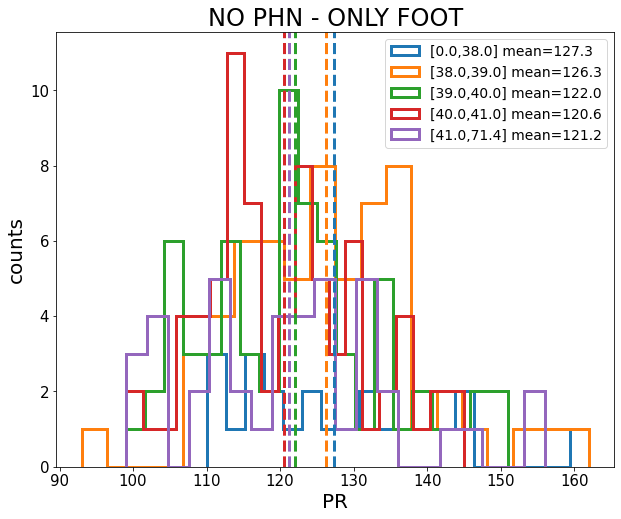

In [20]:
plt.figure(figsize=(10,8))
for i in range(len(sel)):
    data = T['MED_PR'][sel[i] & (T['MED_PR']>10)& (T['PHN']==0) & (T['FOOT']==1)] # 
    plt.hist(data,bins=20,histtype='step',color='C%i'%i,lw=3,label='[%.1f,%.1f] mean=%.1f'%(slots[i]/7.,slots[i+1]/7,np.mean(data)))
    plt.axvline(np.mean(data),color='C%i'%i,ls='dashed',lw=3)
plt.xlabel('PR')
plt.ylabel('counts')
plt.legend(fontsize='x-small')
plt.title('NO PHN - ONLY FOOT')
plt.show()

In [21]:
def plot_hist_split(prop='MED_PR',select=((T['MED_PR']>10)& (T['PHN']==0) & (T['FOOT']==1)),running_sel=sel,slots=np.array(slots)/7.):
    fig = plt.figure(figsize=(10,8))
    for i in range(len(running_sel)):
        data = T[prop][running_sel[i] & select]  
        plt.hist(data,bins=20,histtype='step',color='C%i'%i,lw=3,label='[%.1f,%.1f] mean=%.1f'%(slots[i],slots[i+1],np.mean(data)))
        plt.axvline(np.mean(data),color='C%i'%i,ls='dashed',lw=3)
    plt.xlabel(prop)
    plt.ylabel('counts')
    plt.legend(fontsize='x-small')
    #plt.title('NO PHN - ONLY FOOT')
    return fig


In [22]:
def plot_graph_split(prop='MED_PR',select=((T['MED_PR']>10)& (T['PHN']==0) & (T['FOOT']==1)),running_sel=sel,slots=np.array(slots)/7.,running_prop='GESTATIONAL_AGE',txt_y=100,txt_x=38,conversion=1/7.):
    fig = plt.figure(figsize=(10,8))
    y = []
    x = []
    xerr = []
    yerr = []

    for i in range(len(running_sel)):
        tot_sel = running_sel[i] & select
        data = T[prop][tot_sel]  
        
        if i==0:
            data_first = data
        elif i ==len(running_sel)-1:
            data_last = data
        
        y.append(np.mean(data))
        
        
        x.append(np.mean(T[running_prop][tot_sel])*conversion)
        #xerr.append(np.std(T[running_prop][tot_sel]/7.)/np.sqrt(len(data)))
        
        
        yerr.append(np.std(data))#/np.sqrt(len(data)) )
        #yerr.append(ss.iqr(data) )

        
        #plt.hist(data,bins=20,histtype='step',color='C%i'%i,lw=3,label='[%.1f,%.1f] mean=%.1f'%(slots[i],slots[i+1],np.mean(data)))
        #plt.axvline(np.mean(data),color='C%i'%i,ls='dashed',lw=3)
        print(len(data))
        #print(len(T[running_prop][tot_sel]))
    x = np.array(x)
    y = np.array(y)
    #xerr = np.array(xerr)
    yerr = np.array(yerr)
    
    #98,140
    plt.text(txt_x,txt_y,'difference extremes = %.2f, p-value %.6f'%(np.mean(data_first)-np.mean(data_last),ss.ttest_ind(data_first,data_last)[1]))
    
    #plt.errorbar(x,y,xerr=xerr,yerr=yerr,color='k',lw=5)
    plt.errorbar(x,y,yerr=yerr,color='k',lw=5)
    plt.plot(x,y,".",markersize=30,color='k')

    plt.xlabel(running_prop)
    plt.ylabel(prop)
    #plt.legend(fontsize='x-small')
    #plt.title('NO PHN - ONLY FOOT')
    return fig


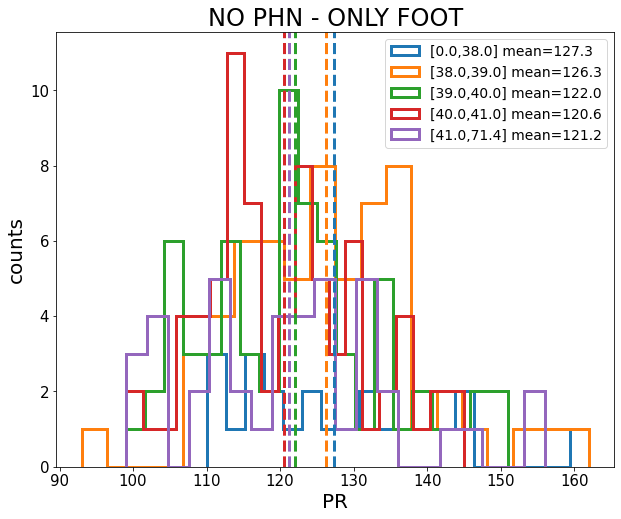

In [23]:
plot_hist_split('MED_PR',select=(T['MED_PR']>10)& (T['PHN']==0) & (T['FOOT']==1))
plt.xlabel('PR')
plt.title('NO PHN - ONLY FOOT')
plt.show()

24
69
67
79
40


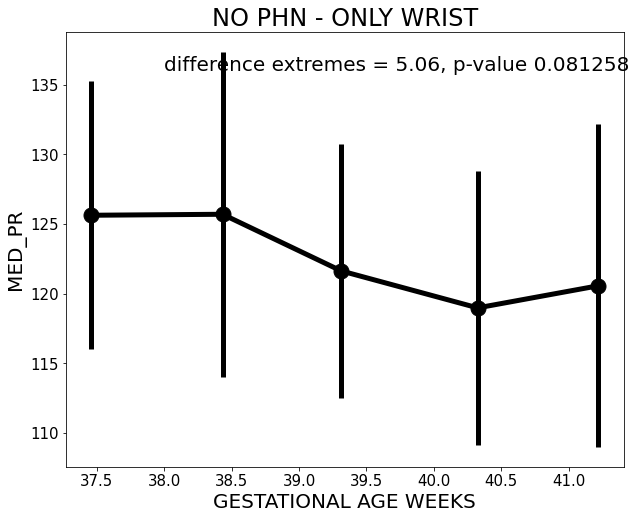

In [24]:
plot_graph_split('MED_PR',select=(T['MED_PR']>10)& (T['PHN']==0) & (T['WRIST']==1),running_prop='GEST_AGE_DAYS',txt_y=136)
plt.xlabel('GESTATIONAL AGE WEEKS')
plt.title('NO PHN - ONLY WRIST')
plt.show()

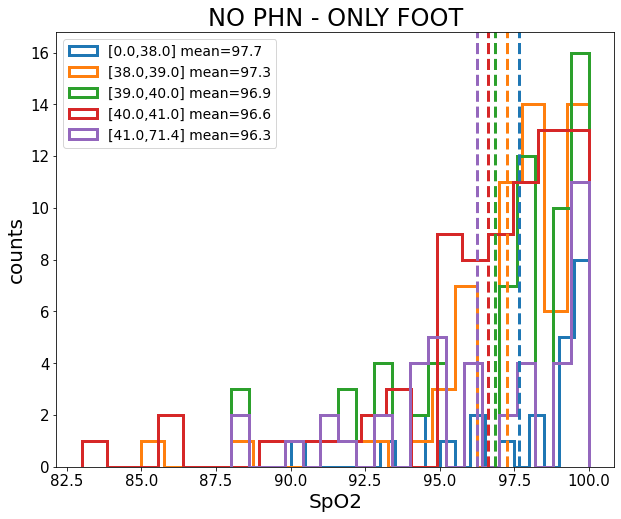

In [25]:
plot_hist_split('MED_SPO2',select=(T['MED_SPO2']>10)& (T['PHN']==0) & (T['FOOT']==1))
plt.xlabel('SpO2')
plt.title('NO PHN - ONLY FOOT')
plt.show()

24
69
67
79
40


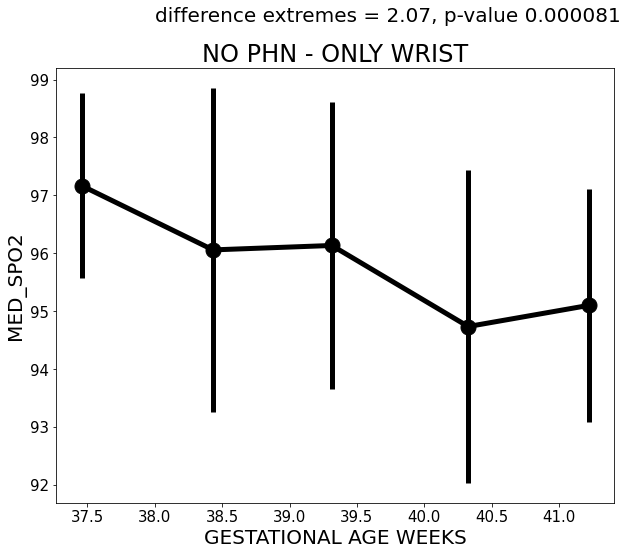

In [26]:
plot_graph_split('MED_SPO2',select=(T['MED_SPO2']>10)& (T['PHN']==0) & (T['WRIST']==1),running_prop='GEST_AGE_DAYS')
plt.title('NO PHN - ONLY WRIST')
plt.xlabel('GESTATIONAL AGE WEEKS')
plt.show()

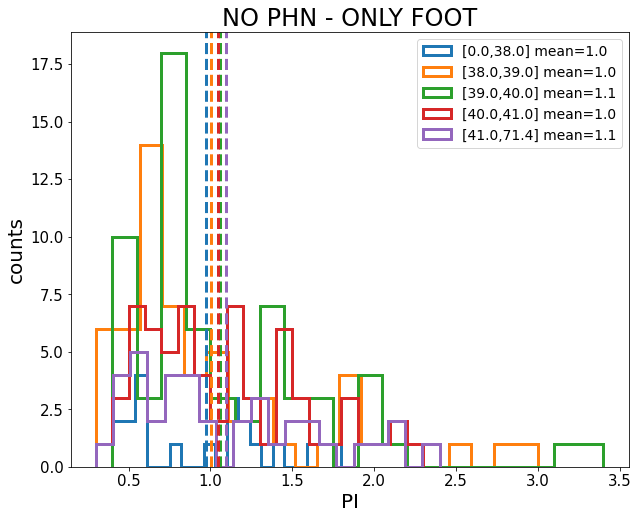

In [27]:
plot_hist_split('MED_PI',select=(T['MED_PI']>0.)& (T['PHN']==0) & (T['FOOT']==1))
plt.xlabel('PI')
plt.title('NO PHN - ONLY FOOT')
plt.show()

In [28]:
# This means single baby!
len(T[(T['PHN']==0) & (T['FOOT']==1)])

268

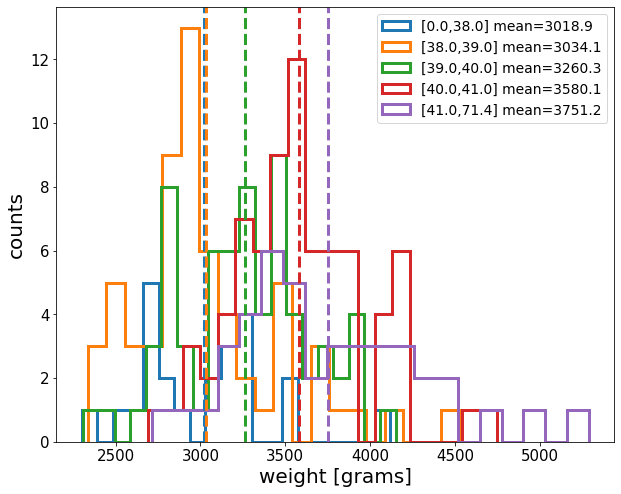

In [29]:
plot_hist_split('WEIGHT_GRAMS',select=( (T['PHN']==0) & (T['FOOT']==1)))
plt.xlabel('weight [grams]')
#plt.title('NO PHN - ONLY FOOT')
plt.show()

23
61
67
75
42


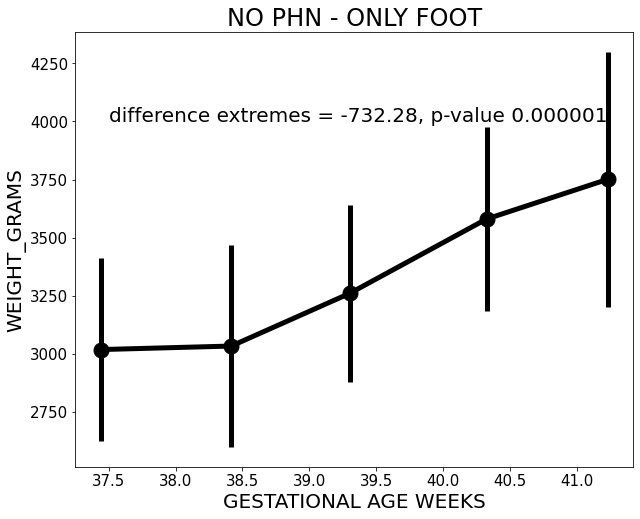

In [30]:
plot_graph_split('WEIGHT_GRAMS',select=( (T['PHN']==0) & (T['FOOT']==1)),running_prop='GEST_AGE_DAYS',txt_y=4000,txt_x=37.5)
plt.title('NO PHN - ONLY FOOT')
plt.xlabel('GESTATIONAL AGE WEEKS')
plt.show()

# Just checking two distribution

In [31]:
sel_smal_GA = (T['GEST_AGE_DAYS']<39.*7) & (T['PHN']==0) & (T['FOOT']==1) & (T['MED_SPO2']>10)
sel_big_GA  = (T['GEST_AGE_DAYS']>40.*7) & (T['PHN']==0) & (T['FOOT']==1) & (T['MED_SPO2']>10)

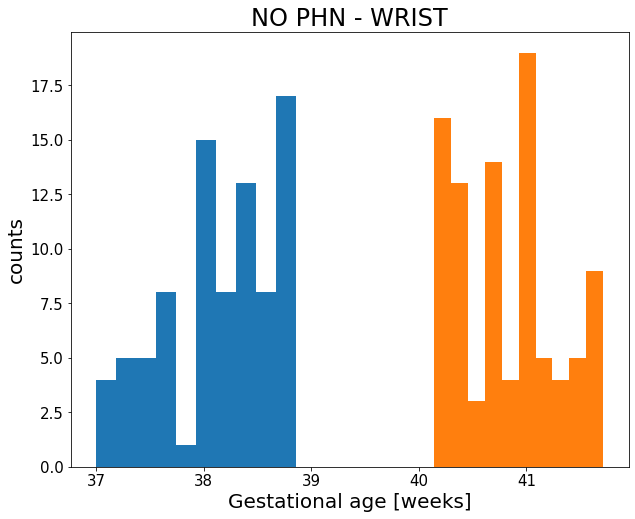

In [32]:
plt.figure(figsize=(10,8))
plt.hist(T['GEST_AGE_DAYS'][sel_smal_GA]/7.)
plt.hist(T['GEST_AGE_DAYS'][sel_big_GA]/7.)
plt.xlabel('Gestational age [weeks]')
plt.ylabel('counts')
plt.title('NO PHN - WRIST')
plt.show()

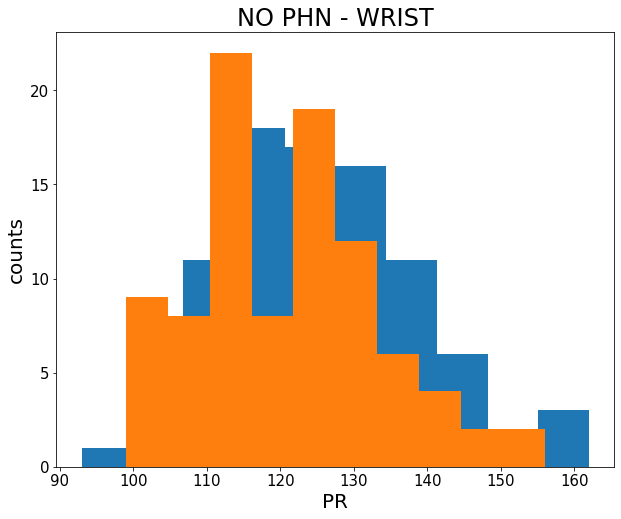

In [33]:
plt.figure(figsize=(10,8))
plt.hist(T['MED_PR'][sel_smal_GA])
plt.hist(T['MED_PR'][sel_big_GA])
plt.xlabel('PR')
plt.ylabel('counts')
plt.title('NO PHN - WRIST')
plt.show()

In [34]:
def compare2samples(data1,data2,txt_x=100,txt_y=10,density=False):
    fig = plt.figure(figsize=(10,8))
    plt.hist(data1,bins=20,histtype='step',lw=4,color='C0',density=density)
    plt.hist(data2,bins=20,histtype='step',lw=4,color='C1',density=density)
    plt.axvline(np.mean(data1),ls='dashed',lw=5,color='C0')
    plt.axvline(np.mean(data2),ls='dashed',lw=5,color='C1')
    plt.text(txt_x,txt_y,'mean1 = %.2f (#%i)\nmean2 = %.2f(#%i)\nstd1 = %.2f\nstd2 = %.2f'%(np.mean(data1),len(data1),np.mean(data2),len(data2),np.std(data1),np.std(data2)))

    plt.title('difference extremes = %.2f, p-value %.6f'%(np.mean(data1)-np.mean(data2),ss.ttest_ind(data1,data2)[1]))
    return fig

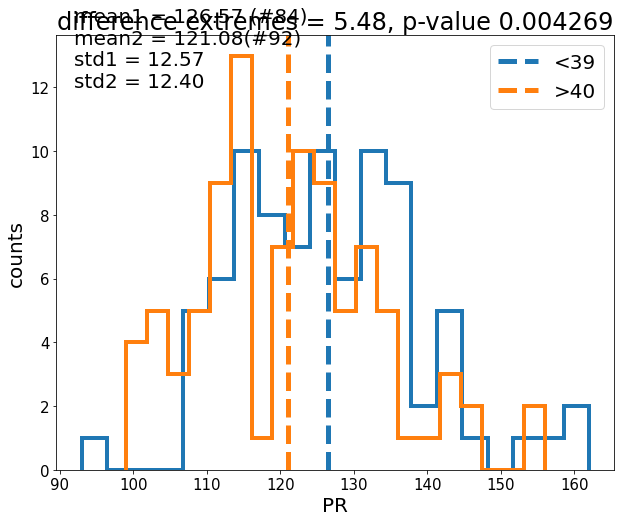

In [35]:
compare2samples(T['MED_PR'][sel_smal_GA],T['MED_PR'][sel_big_GA],txt_x=92,txt_y=12)
plt.legend(['<39','>40'])
plt.xlabel('PR')
plt.ylabel('counts')
plt.show()

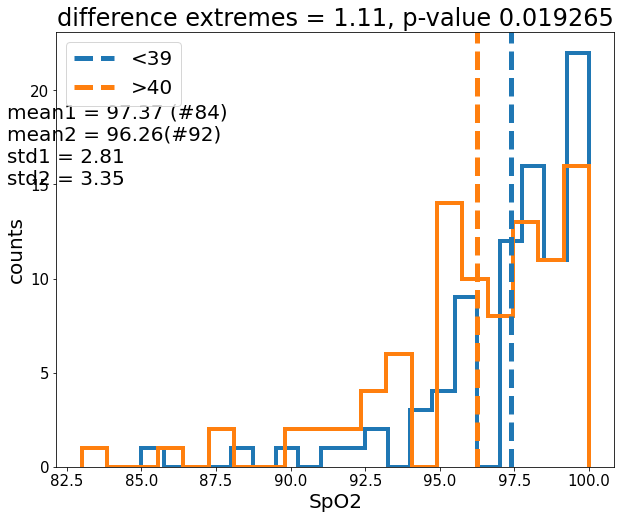

In [36]:
compare2samples(T['MED_SPO2'][sel_smal_GA],T['MED_SPO2'][sel_big_GA],txt_x=80.5,txt_y=15)
plt.legend(['<39','>40'])
plt.xlabel('SpO2')
plt.ylabel('counts')
plt.show()

/home/giorgio/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/giorgio/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/giorgio/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/giorgio/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


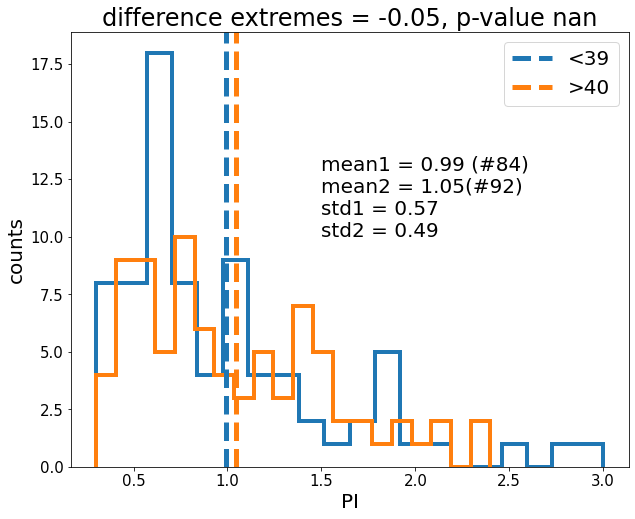

In [37]:
compare2samples(T['MED_PI'][sel_smal_GA],T['MED_PI'][sel_big_GA],txt_x=1.5,txt_y=10)
plt.legend(['<39','>40'])
plt.xlabel('PI')
plt.ylabel('counts')
plt.show()

# Plots as a function of time

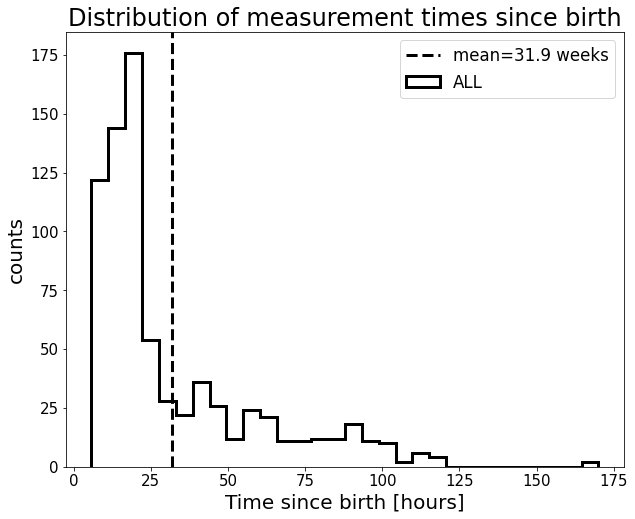

In [38]:
fig,ax = plt.subplots(figsize=(10,8))

quantity = np.array(T['DELTA_SEC_MEASURE'])/60./60.

ax.hist(quantity,bins=30,histtype='step',lw=3,color='k',label='ALL')
ax.axvline(np.mean(quantity),color='k',ls='dashed',lw=3,label='mean=%.1f weeks'%(np.mean(quantity)))
ax.set_xlabel('Time since birth [hours]')
ax.set_ylabel('counts')

plt.title('Distribution of measurement times since birth')


plt.legend(fontsize='small')
plt.show()

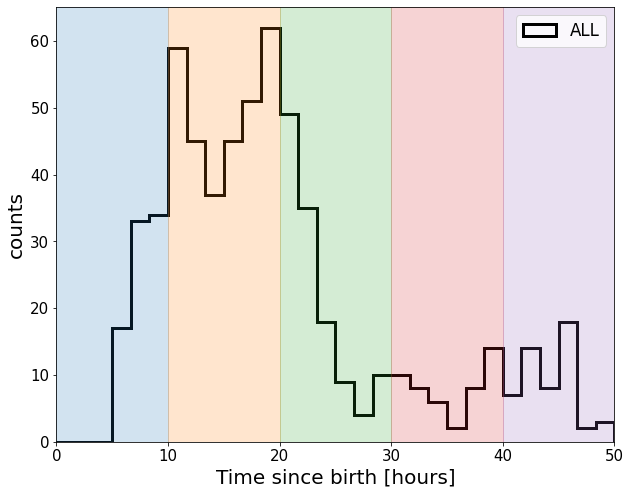

In [39]:
fig,ax = plt.subplots(figsize=(10,8))

quantity = np.array(T['DELTA_SEC_MEASURE'])/60./60.

ax.hist(quantity,bins=30,histtype='step',lw=3,color='k',label='ALL',range=(0,50))
#ax.axvline(np.mean(quantity),color='k',ls='dashed',lw=3,label='mean=%.1f weeks'%(np.mean(quantity)))
ax.set_xlabel('Time since birth [hours]')
ax.set_ylabel('counts')


ax.axvspan(0, 10, alpha=0.2, color='C0')
ax.axvspan(10, 20, alpha=0.2, color='C1')
ax.axvspan(20, 30, alpha=0.2, color='C2')
ax.axvspan(30, 40, alpha=0.2, color='C3')
ax.axvspan(40, 100, alpha=0.2, color='C4')

plt.xlim(0,50)
plt.legend(fontsize='small')
plt.show()

In [40]:
slots_hour = [0.,10,20,30,40,100.]
#slots_hour = [0.,50,100.]

In [41]:
sel_delta_t = []

DELTA_HOURS = np.array(T['DELTA_SEC_MEASURE'])/60./60.

for i in range(len(slots_hour)-1):
    sel_delta_t.append((DELTA_HOURS>= slots_hour[i])&(DELTA_HOURS< slots_hour[i+1]))


In [42]:
for i in range(len(slots_hour)-1):
    print('MEAN VALUES %i < delta_t <  %i [hours]'%(slots_hour[i],slots_hour[i+1]))
    print('##################################')
    print(T[sel_delta_t[i]].mean())
    print('\n')

MEAN VALUES 0 < delta_t <  10 [hours]
##################################
WEIGHT_GRAMS           3426.857143
GEST_AGE_DAYS           277.095238
DELTA_SEC_MEASURE     28147.547619
MED_SPO2                 96.392857
MED_PR                  115.553571
MED_PI                    1.142500
MEAN_SPO2                95.763150
MEAN_PR                 116.227340
MEAN_PI                   1.476321
STD_SPO2                  2.549560
STD_PR                    8.829295
STD_PI                    1.198609
PHN                       0.000000
WRIST                     0.500000
FOOT                      0.440476
BRADY_SEC_PR           1919.119048
BRADY_RATIO_PR            0.612081
BRADY_RATIO_PR_m10        0.327901
BRADY_RATIO_PR_m20        0.097388
BRADY_RATIO_PR_m30        0.025085
BRADY_RATIO_PR_m40        0.016499
BRADY_SEC_SPO2         2215.571429
BRADY_RATIO_SPO2          0.565567
BRADY_SEC_PR_DYN       1510.500000
BRADY_RATIO_PR_DYN        0.466276
dtype: float64


MEAN VALUES 10 < delta_t <  20 [hou

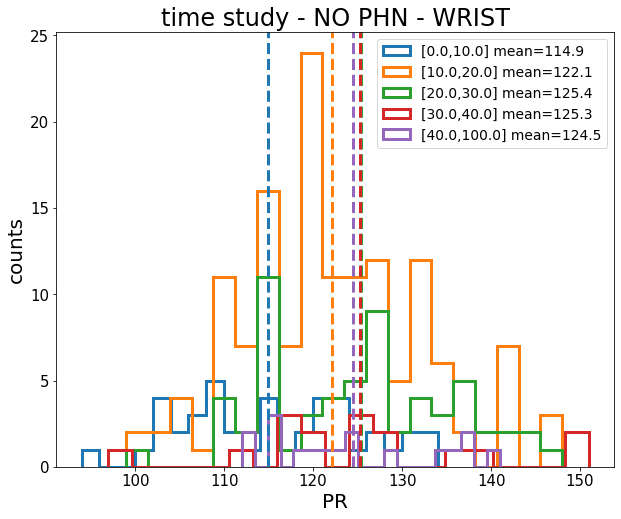

In [43]:
plot_hist_split(prop='MED_PR',select=((T['MED_PR']>10)& (T['PHN']==0) & (T['WRIST']==1)),running_sel=sel_delta_t,slots=slots_hour)
plt.title('time study - NO PHN - WRIST')
plt.xlabel('PR')
plt.show()

42
143
61
16
17


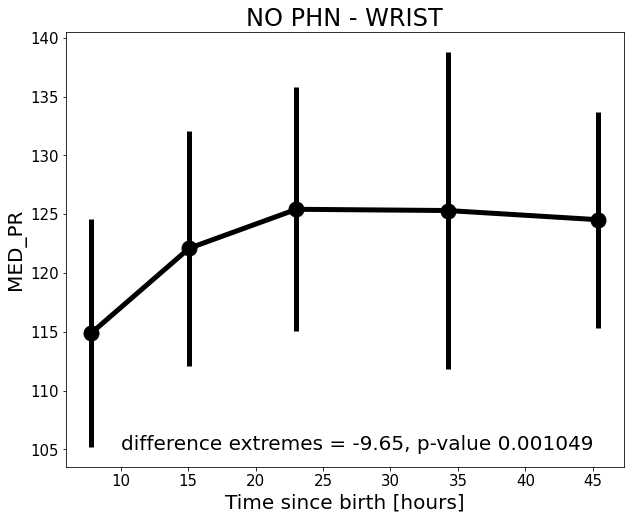

In [44]:
plot_graph_split(prop='MED_PR',select=((T['MED_PR']>10)& (T['PHN']==0) & (T['WRIST']==1)),running_sel=sel_delta_t,slots=slots_hour,running_prop='DELTA_SEC_MEASURE',txt_y=105,txt_x=10,conversion=1/60./60.)
plt.xlabel('Time since birth [hours]')
plt.title('NO PHN - WRIST')
plt.show()


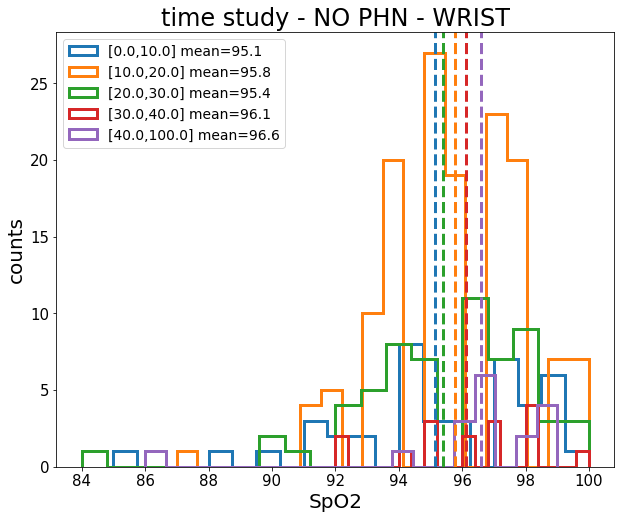

In [45]:
plot_hist_split(prop='MED_SPO2',select=((T['MED_SPO2']>10)& (T['PHN']==0) & (T['WRIST']==1)),running_sel=sel_delta_t,slots=slots_hour)
plt.title('time study - NO PHN - WRIST')
plt.xlabel('SpO2')
plt.show()

42
143
61
16
17


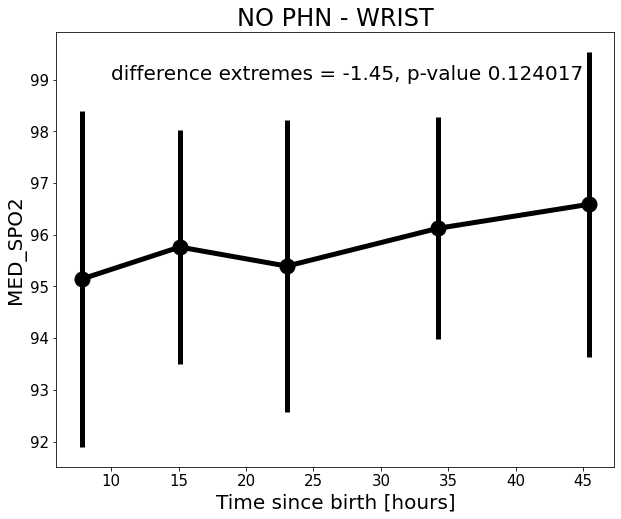

In [46]:
plot_graph_split(prop='MED_SPO2',select=((T['MED_SPO2']>10)& (T['PHN']==0) & (T['WRIST']==1)),running_sel=sel_delta_t,slots=slots_hour,running_prop='DELTA_SEC_MEASURE',conversion=1/60./60.,txt_x=10,txt_y=99.)
plt.xlabel('Time since birth [hours]')
plt.title('NO PHN - WRIST')
plt.show()


37
142
59
13
17


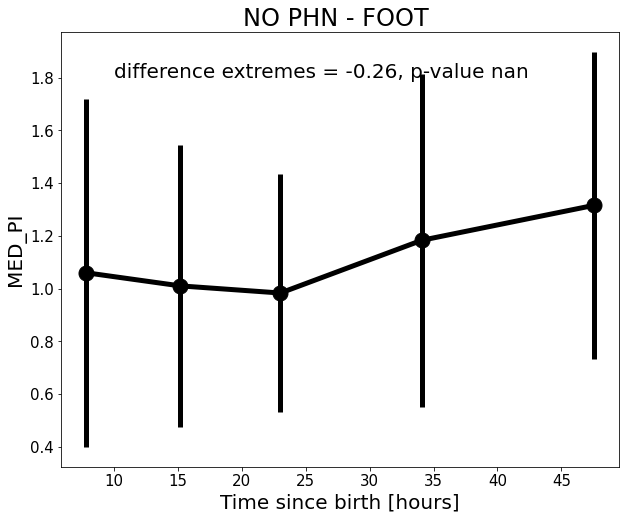

In [47]:
plot_graph_split(prop='MED_PI',select=((T['MED_SPO2']>10)& (T['PHN']==0) & (T['FOOT']==1)),running_sel=sel_delta_t,slots=slots_hour,running_prop='DELTA_SEC_MEASURE',conversion=1/60./60.,txt_x=10,txt_y=1.8)

plt.xlabel('Time since birth [hours]')
plt.title('NO PHN - FOOT ')


plt.show()


42
143
61
16
17


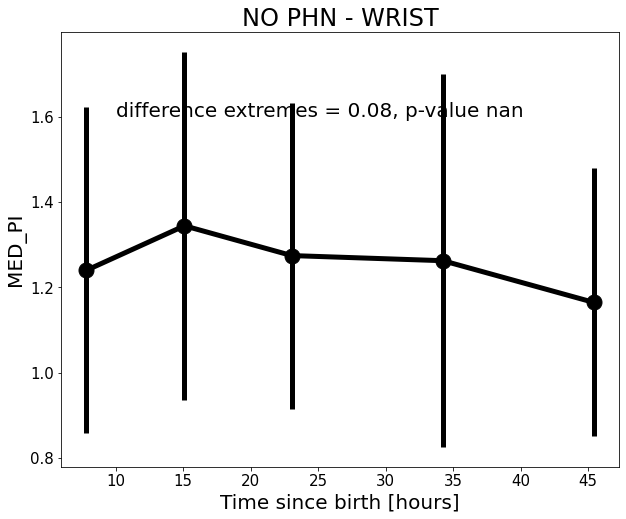

In [82]:
plot_graph_split(prop='MED_PI',select=((T['MED_SPO2']>10)& (T['PHN']==0) & (T['WRIST']==1)),running_sel=sel_delta_t,slots=slots_hour,running_prop='DELTA_SEC_MEASURE',conversion=1/60./60.,txt_x=10,txt_y=1.6)
plt.xlabel('Time since birth [hours]')
plt.title('NO PHN - WRIST')
plt.show()

# Checking babies < 24 h an > 24 h

In [49]:
sel_smal_time = (T['DELTA_SEC_MEASURE']<=24.*60*60) & (T['WRIST']==1) & (T['MED_SPO2']>10) #& (T['PHN']==0) 
sel_big_time  = (T['DELTA_SEC_MEASURE']>24.*60*60) & (T['WRIST']==1) & (T['MED_SPO2']>10) #& (T['PHN']==0) 

In [50]:
sel_smal_time_nophn = (T['DELTA_SEC_MEASURE']<=24.*60*60) & (T['WRIST']==1) & (T['MED_SPO2']>10)& (T['PHN']==0) 
sel_big_time_nophn  = (T['DELTA_SEC_MEASURE']>24.*60*60) & (T['WRIST']==1) & (T['MED_SPO2']>10) & (T['PHN']==0) 

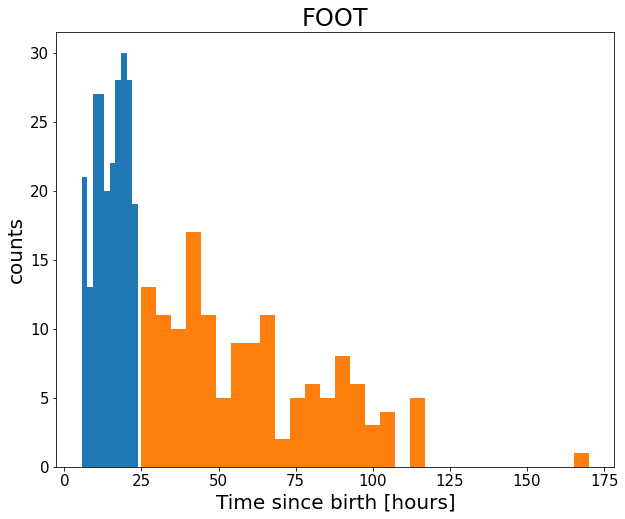

In [51]:
plt.figure(figsize=(10,8))
plt.hist(T['DELTA_SEC_MEASURE'][sel_smal_time]/60/60.)
plt.hist(T['DELTA_SEC_MEASURE'][sel_big_time]/60/60.,bins=30)
plt.xlabel('Time since birth [hours]')
plt.ylabel('counts')
plt.title('FOOT')
plt.show()

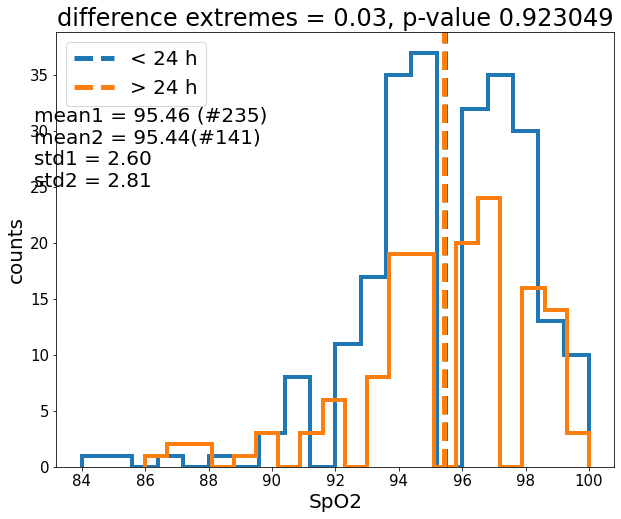

In [52]:
compare2samples(T['MED_SPO2'][sel_smal_time],T['MED_SPO2'][sel_big_time],density=False,txt_y=25,txt_x=82.5)
plt.xlabel('SpO2')
plt.ylabel('counts')
plt.legend(['< 24 h','> 24 h'],loc=2)
plt.show()

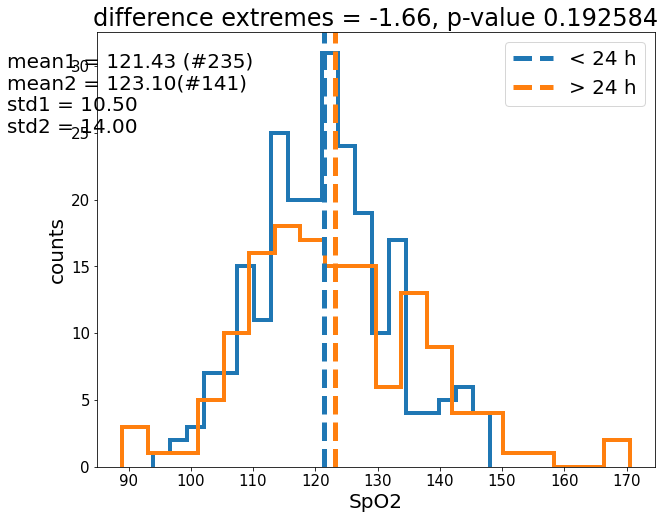

In [53]:
compare2samples(T['MED_PR'][sel_smal_time],T['MED_PR'][sel_big_time],density=False,txt_y=25,txt_x=70.5)
plt.xlabel('SpO2')
plt.ylabel('counts')
plt.legend(['< 24 h','> 24 h'],loc=1)
plt.show()

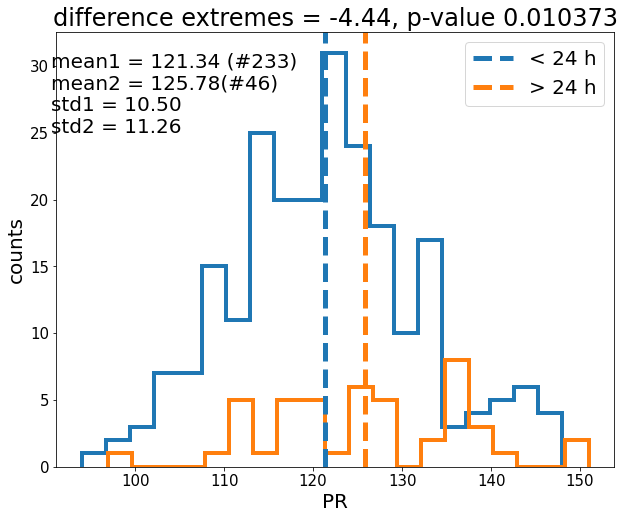

In [54]:
compare2samples(T['MED_PR'][sel_smal_time_nophn],T['MED_PR'][sel_big_time_nophn],density=False,txt_y=25,txt_x=90.5)
plt.xlabel('PR')
plt.ylabel('counts')
plt.legend(['< 24 h','> 24 h'],loc=1)
plt.show()

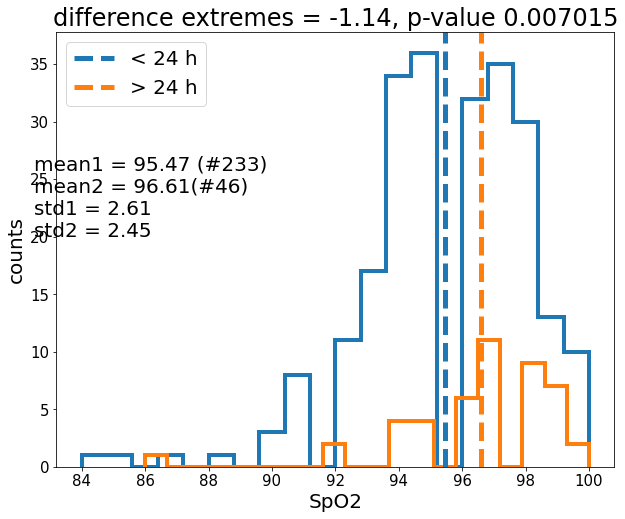

In [55]:
compare2samples(T['MED_SPO2'][sel_smal_time_nophn],T['MED_SPO2'][sel_big_time_nophn],density=False,txt_y=20,txt_x=82.5)
plt.xlabel('SpO2')
plt.ylabel('counts')
plt.legend(['< 24 h','> 24 h'],loc=2)
plt.show()

# Simple plot of SpO2 vs time since birth

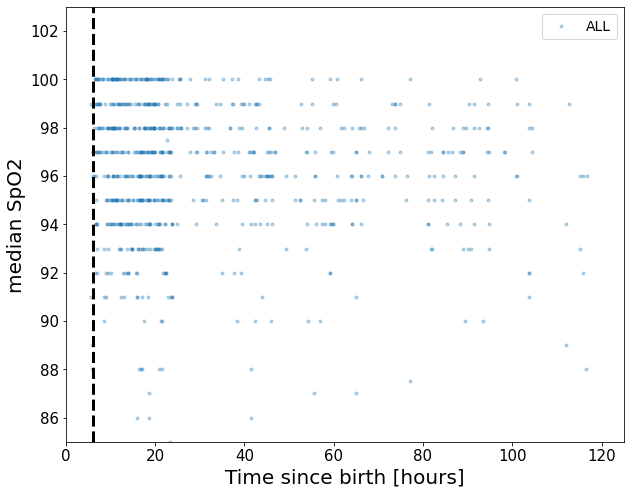

In [56]:
plt.figure(figsize=(10,8))
plt.plot(T['DELTA_SEC_MEASURE']/60/60,T['MED_SPO2'],".",label='ALL',alpha=0.3)
#plt.plot(g_delta_t_hours[g_spo2_median>10.],g_spo2_median[g_spo2_median>10.],"oC1",label='GIRLS ('+str(len(g_spo2_median))+' measurements)',alpha=1.,markersize=10)
#plt.plot(b_delta_t_hours[b_spo2_median>10.],b_spo2_median[b_spo2_median>10.],"xC2",label='BOYS ('+str(len(b_spo2_median))+' measurements)',alpha=1.,markersize=7)

#plt.plot(ttg,xxg,lw=4,color='r',label='median girl')
#plt.plot(ttg,xxg,".",lw=4,color='r',markersize=10)
#plt.plot(ttb,xxb,lw=4,color='b',label='median boy')
#plt.plot(ttb,xxb,".",lw=4,color='b',markersize=10)

plt.ylim(85,103)
plt.xlim(0,125)
plt.xlabel('Time since birth [hours]')
plt.ylabel('median SpO2')
plt.axvline(6,color='k',ls='dashed',lw=3)
#plt.title('FOOT ')
plt.legend(fontsize='x-small')
#plt.savefig('../plots/003/SpO2_vs_time_boysgirls_wrist.png')
plt.show()

# Checking the distribution of PI  for wrist and foot

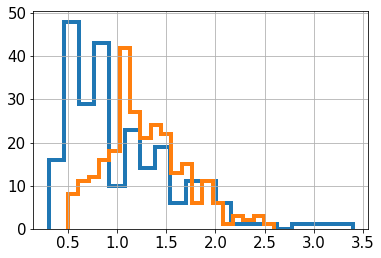

1.0405349794238683
1.2971374045801527
median1 =  0.9
median2 =  1.2
0.5536940310786816
0.3945736565369746
iqr1 =  0.7000000000000001
iqr2 =  0.3999999999999999
-0.2566024251562844


In [57]:
data1 = T['MED_PI'][(T['FOOT']==1)&(T['MED_PI']>0.1)&(T['PHN']==0) ]
data2 = T['MED_PI'][(T['WRIST']==1)&(T['MED_PI']>0.1)&(T['PHN']==0) ]
#T['MED_PI'][T['FOOT']==1 ].hist(histtype='step',lw=4,bins=30)
#T['MED_PI'][T['WRIST']==1 ].hist(histtype='step',lw=4,bins=30)

data1.hist(histtype='step',lw=4,bins=20)
data2.hist(histtype='step',lw=4,bins=20)
plt.show()


print(np.mean(data1))
print(np.mean(data2))
print('median1 = ',np.median(data1))
print('median2 = ',np.median(data2))
print(np.std(data1))
print(np.std(data2))
print('iqr1 = ',ss.iqr(data1))
print('iqr2 = ',ss.iqr(data2))

print(np.mean(data1)-np.mean(data2))

## T-student test for PI value foot / wrist

In [58]:
ss.ttest_ind(data1[~np.isnan(data1)],data2[~np.isnan(data2)])

Ttest_indResult(statistic=-6.018104031769209, pvalue=3.402793427202723e-09)

In [59]:
len(data2[~np.isnan(data2)])

262

In [60]:
len(data2)

262

In [61]:
len(data1[~np.isnan(data1)])

243

In [62]:
len(data1)

243

In [63]:
ss.ttest_ind(data1,data2)

Ttest_indResult(statistic=-6.018104031769209, pvalue=3.402793427202723e-09)

# Checking BRADYCARDIA

In [64]:
brad_pr = T[(T['PHN']==False)&(T['WRIST']==True)]['BRADY_RATIO_PR']*100
brad_pr_m10 = T[(T['PHN']==False)&(T['WRIST']==True)]['BRADY_RATIO_PR_m10']*100
brad_pr_m20 = T[(T['PHN']==False)&(T['WRIST']==True)]['BRADY_RATIO_PR_m20']*100
brad_pr_m30 = T[(T['PHN']==False)&(T['WRIST']==True)]['BRADY_RATIO_PR_m30']*100
brad_pr_m40 = T[(T['PHN']==False)&(T['WRIST']==True)]['BRADY_RATIO_PR_m40']*100



m_brad_pr = T[(T['PHN']==False)&(T['WRIST']==True)&(T['GENDER']=='Male')]['BRADY_RATIO_PR']*100
f_brad_pr = T[(T['PHN']==False)&(T['WRIST']==True)&(T['GENDER']=='Female')]['BRADY_RATIO_PR']*100


In [65]:
brad_spo2 = T[(T['PHN']==False)&(T['WRIST']==True)]['BRADY_RATIO_SPO2']*100
m_brad_spo2 = T[(T['PHN']==False)&(T['WRIST']==True)&(T['GENDER']=='Male')]['BRADY_RATIO_SPO2']*100
f_brad_spo2 = T[(T['PHN']==False)&(T['WRIST']==True)&(T['GENDER']=='Female')]['BRADY_RATIO_SPO2']*100

In [66]:
brad_pr_dyn = T[(T['PHN']==False)&(T['WRIST']==True)]['BRADY_RATIO_PR_DYN']*100

m_brad_pr_dyn = T[(T['PHN']==False)&(T['WRIST']==True)&(T['GENDER']=='Male')]['BRADY_RATIO_PR_DYN']*100
f_brad_pr_dyn = T[(T['PHN']==False)&(T['WRIST']==True)&(T['GENDER']=='Female')]['BRADY_RATIO_PR_DYN']*100

brad_pr_dyn_l39 = T[(T['PHN']==False)&(T['WRIST']==True)&(T['GEST_AGE_DAYS']/7.<39.)]['BRADY_RATIO_PR_DYN']*100
brad_pr_dyn_g40 = T[(T['PHN']==False)&(T['WRIST']==True)&(T['GEST_AGE_DAYS']/7.>40.)]['BRADY_RATIO_PR_DYN']*100


pr_med = T[(T['PHN']==False)&(T['WRIST']==True)]['MED_PR']

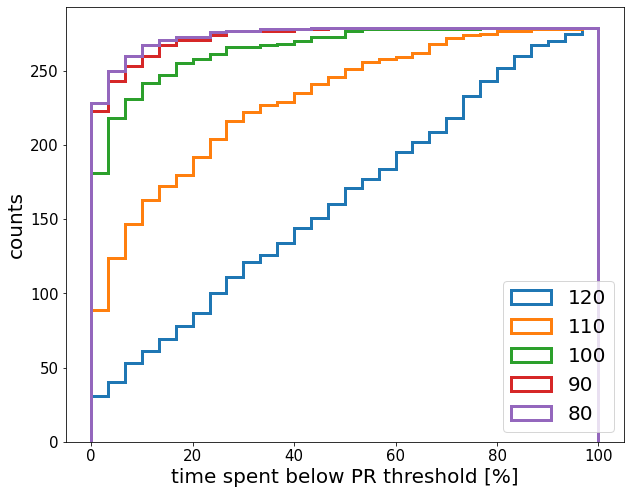

In [67]:
plt.figure(figsize=(10,8))
plt.hist(brad_pr,    bins=30,range=(0,100),histtype='step',lw=3,label='120', color='C0',density=False,cumulative=True)
plt.hist(brad_pr_m10,bins=30,range=(0,100),histtype='step',lw=3,label='110', color='C1',density=False,cumulative=True)
plt.hist(brad_pr_m20,bins=30,range=(0,100),histtype='step',lw=3,label='100', color='C2',density=False,cumulative=True)
plt.hist(brad_pr_m30,bins=30,range=(0,100),histtype='step',lw=3,label='90', color='C3' ,density=False,cumulative=True)
plt.hist(brad_pr_m40,bins=30,range=(0,100),histtype='step',lw=3,label='80', color='C4' ,density=False,cumulative=True)

plt.xlabel("time spent below PR threshold [%]")
plt.ylabel('counts')
plt.legend(loc=4)
plt.show()

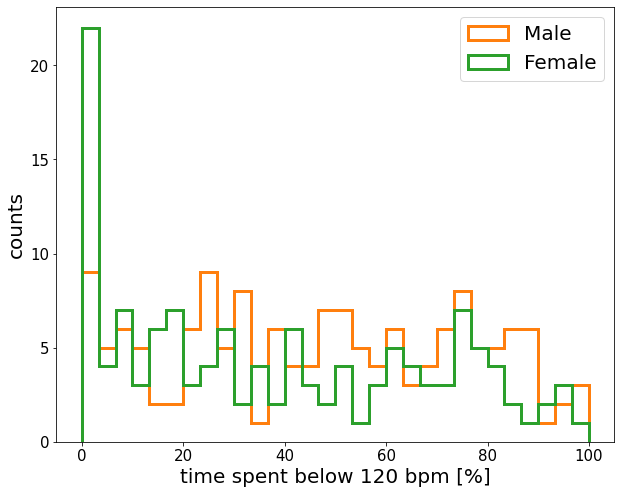

In [68]:
plt.figure(figsize=(10,8))
#plt.hist(brad_pr,  bins=30,histtype='step',lw=3,label='All',color='C0')
plt.hist(m_brad_pr,bins=30,range=(0,100),histtype='step',lw=3,label='Male', color='C1')
plt.hist(f_brad_pr,bins=30,range=(0,100),histtype='step',lw=3,label='Female' , color='C2')
plt.xlabel("time spent below 120 bpm [%]")
plt.ylabel('counts')
plt.legend()
plt.show()

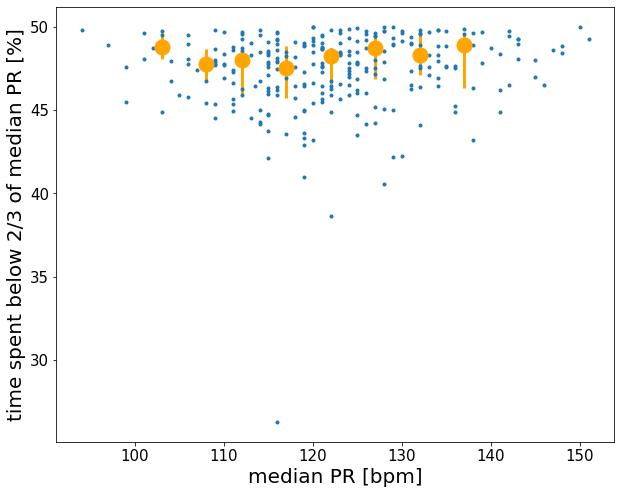

In [69]:
plt.figure(figsize=(10,8))


plt.plot(pr_med,brad_pr_dyn,".")

xx,yy,ey1,ey2 = median_in_bins_err(pr_med,brad_pr_dyn,100,140,8)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',label ='median')

plt.xlabel('median PR [bpm]')
#plt.ylabel('time spent below 9/10 of median PR [%]')
plt.ylabel("time spent below 2/3 of median PR [%]")

#plt.ylim(0,1.25)

plt.show()

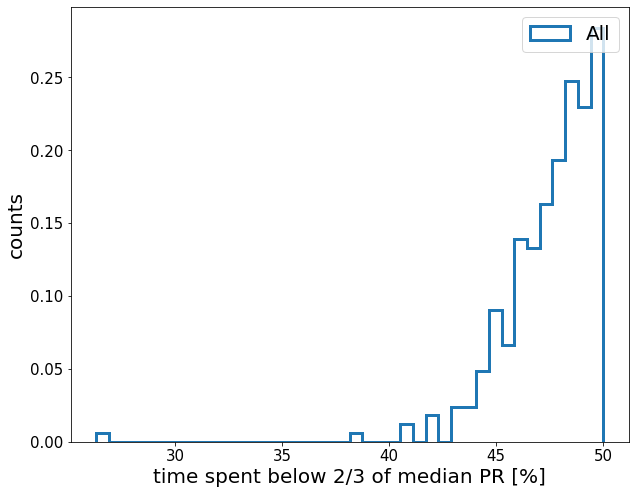

In [70]:
plt.figure(figsize=(10,8))
plt.hist(brad_pr_dyn,  bins=40,histtype='step',lw=3,label='All',color='C0',cumulative=False,density=True)
#plt.hist(brad_pr_dyn_l39,bins=30,range=(0,50),histtype='step',lw=3,label='Gest.Age < 39', color='C1')
#plt.hist(brad_pr_dyn_g40,bins=30,range=(0,50),histtype='step',lw=3,label='Gest.Age > 40' , color='C2')

#plt.xlabel("time spent below 9/10 of median PR [%]")
plt.xlabel("time spent below 2/3 of median PR [%]")
plt.ylabel('counts')
plt.legend()
plt.show()

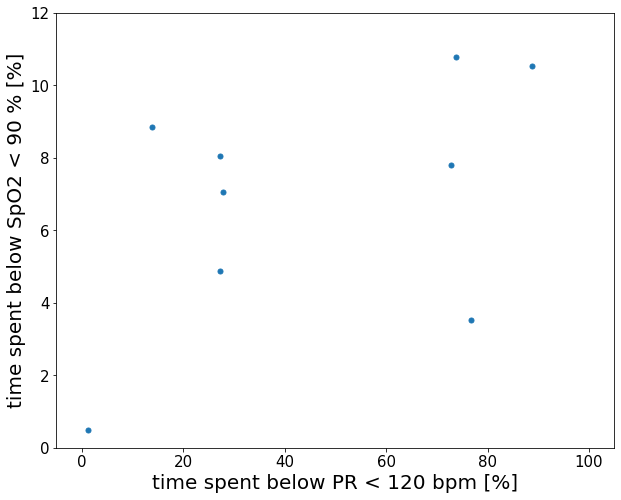

In [71]:
plt.figure(figsize=(10,8))
plt.xlabel("time spent below PR < 120 bpm [%]")
plt.ylabel("time spent below SpO2 < 90 % [%]")

xx,yy,ey1,ey2 = median_in_bins_err(brad_pr,brad_spo2,0,100,7)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',label ='median')

plt.ylim(0,12)

plt.plot(brad_pr,brad_spo2,".",markersize=10)
plt.show()

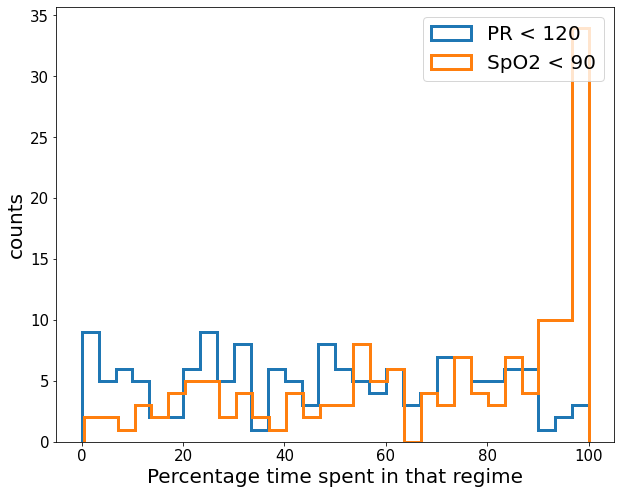

In [72]:
plt.figure(figsize=(10,8))
plt.hist(m_brad_pr,bins=30,histtype='step',lw=3,label='PR < 120', color='C0')
plt.hist(m_brad_spo2,bins=30,histtype='step',lw=3,label='SpO2 < 90', color='C1')
plt.xlabel('Percentage time spent in that regime')
plt.ylabel('counts')
plt.legend()
plt.show()

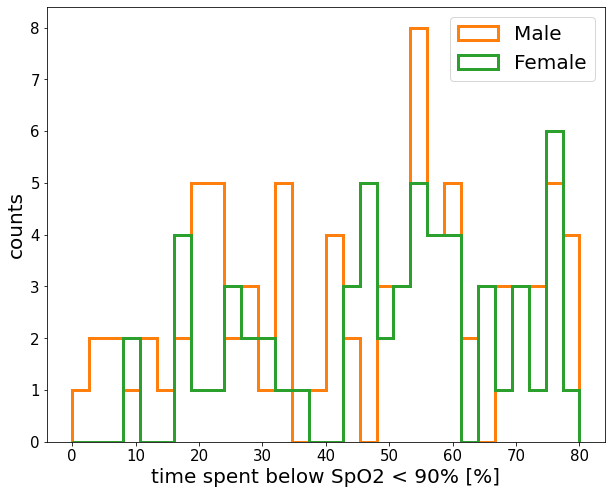

In [73]:
plt.figure(figsize=(10,8))
#plt.hist(brad_pr,  bins=30,histtype='step',lw=3,label='All',color='C0')
plt.hist(m_brad_spo2,bins=30,histtype='step',lw=3,label='Male', color='C1'   ,range=(0,80))
plt.hist(f_brad_spo2,bins=30,histtype='step',lw=3,label='Female' , color='C2',range=(0,80))
plt.xlabel("time spent below SpO2 < 90% [%]")
plt.ylabel('counts')
plt.legend()
plt.show()

In [74]:
weight = T[(T['PHN']==False)&(T['WRIST']==True)]['WEIGHT_GRAMS']
gest = T[(T['PHN']==False)&(T['WRIST']==True)]['GEST_AGE_DAYS']/7.
pr = T[(T['PHN']==False)&(T['WRIST']==True)]['MED_PR']




# ### # ## # # # # # # # # # WEIGHT vs BRADY TIME


# # # # # # # # # # # # # # # gestational age


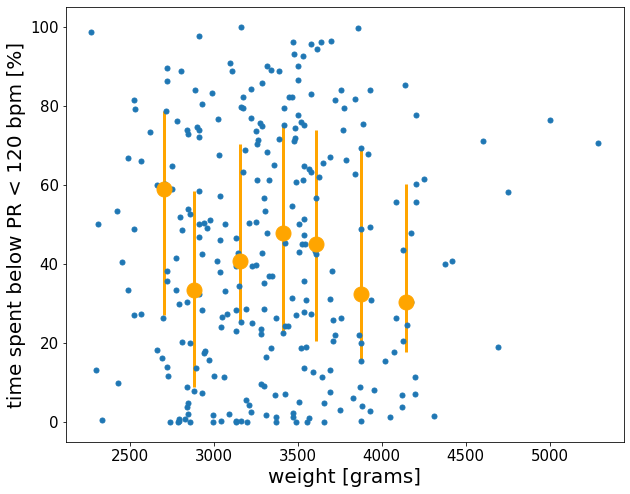

In [75]:
plt.figure(figsize=(10,8))
plt.plot(weight,brad_pr,".",markersize=10)

xx,yy,ey1,ey2 = median_in_bins_err(weight,brad_pr,2500,4300,7)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',label ='median')


plt.xlabel('weight [grams]')
plt.ylabel("time spent below PR < 120 bpm [%]")
plt.show()

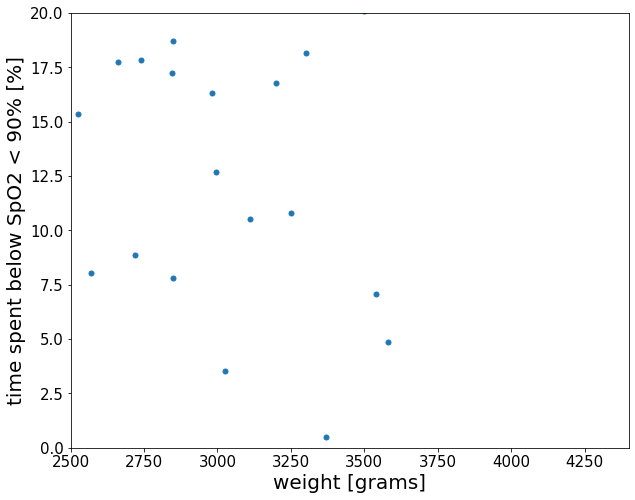

In [76]:
plt.figure(figsize=(10,8))
plt.plot(weight,brad_spo2,".",markersize=10)

xx,yy,ey1,ey2 = median_in_bins_err(weight,brad_spo2,2500,4300,7)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',label ='median')

plt.ylim(0,20)
plt.xlim(2500,4400)

plt.xlabel('weight [grams]')
plt.ylabel("time spent below SpO2 < 90% [%]")
plt.show()

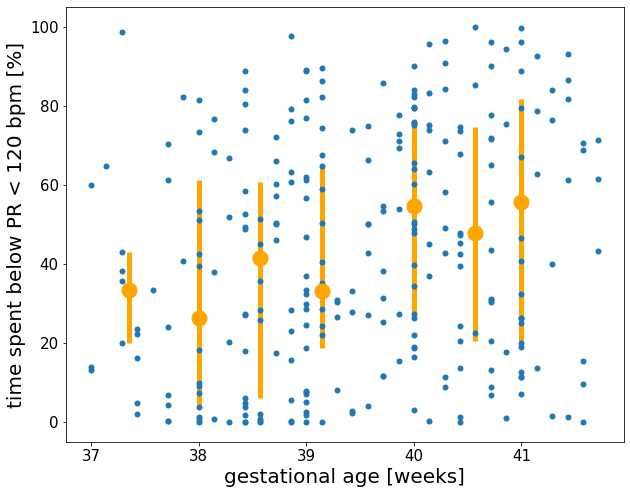

In [77]:
plt.figure(figsize=(10,8))
plt.plot(gest,brad_pr,".",markersize=10)

xx,yy,ey1,ey2 = median_in_bins_err(gest,brad_pr,37,41.5,7)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=5,color='orange',label ='median')

plt.xlabel('gestational age [weeks]')
plt.ylabel("time spent below PR < 120 bpm [%]")
plt.show()

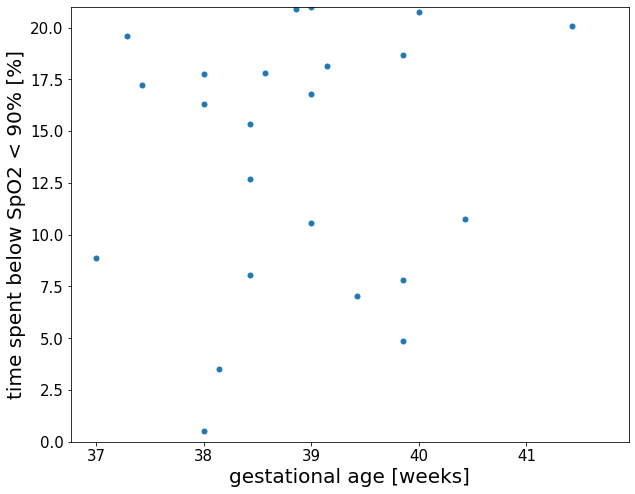

In [78]:
plt.figure(figsize=(10,8))
plt.plot(gest,brad_spo2,".",markersize=10)

xx,yy,ey1,ey2 = median_in_bins_err(gest,brad_spo2,37,41.5,7)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=5,color='orange',label ='median')

plt.ylim(0,21)

plt.xlabel('gestational age [weeks]')
plt.ylabel("time spent below SpO2 < 90% [%]")
plt.show()

In [79]:
T.columns.values

array(['BABY_IDS', 'GENDER', 'WEIGHT_GRAMS', 'GEST_AGE_DAYS', 'DELIVERY',
       'BIRTH_DATE', 'FILE', 'DELTA_SEC_MEASURE', 'MED_SPO2', 'MED_PR',
       'MED_PI', 'MEAN_SPO2', 'MEAN_PR', 'MEAN_PI', 'STD_SPO2', 'STD_PR',
       'STD_PI', 'PHN', 'WRIST', 'FOOT', 'BRADY_SEC_PR', 'BRADY_RATIO_PR',
       'BRADY_RATIO_PR_m10', 'BRADY_RATIO_PR_m20', 'BRADY_RATIO_PR_m30',
       'BRADY_RATIO_PR_m40', 'BRADY_SEC_SPO2', 'BRADY_RATIO_SPO2',
       'BRADY_SEC_PR_DYN', 'BRADY_RATIO_PR_DYN'], dtype=object)

In [80]:
T['BABY_IDS'][T['BRADY_RATIO_PR_DYN']<0.4]

44      FMC011
48      FMC012
62      RGH004
181     FMC042
201     FMC046
244     RGH006
246     RGH007
252     RGH009
288     PLC023
289     PLC023
314     RGH016
380     FMC081
419     FMC092
458     FMC100
464    PLC 034
509     FMC108
574     FMC118
595     RGH036
614     RGH040
694    PLC 050
702    PLC 052
728     RGH064
762     RGH074
Name: BABY_IDS, dtype: object